Panama Climate 
Sarah Lawson Woods
October 2021

Goal:

Planning:

Executive Summary:

In [1]:
# Imports

# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# visualize 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# for modeling
from statsmodels.tsa.api import Holt

import mini_proj_functions as m

# Acquire

In [2]:
df = m.get_temp_data()

In [3]:
df.head(25)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
9,1744-08-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


# Prepare

In [4]:
#first I need to narrow down to data only concerning Panama
df = df.loc[df['Country'] == 'Panama']

In [5]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
5666133,1825-01-01,27.353,1.886,Panamá,Panama,8.84N,80.27W
5666134,1825-02-01,27.392,1.588,Panamá,Panama,8.84N,80.27W
5666135,1825-03-01,27.971,1.862,Panamá,Panama,8.84N,80.27W
5666136,1825-04-01,28.671,2.005,Panamá,Panama,8.84N,80.27W
5666137,1825-05-01,27.077,1.271,Panamá,Panama,8.84N,80.27W


In [22]:
df.shape

(4464, 6)

In [23]:
df.info

<bound method DataFrame.info of             AverageTemperature  AverageTemperatureUncertainty           City  \
dt                                                                             
1825-01-01              27.353                          1.886         Panamá   
1825-02-01              27.392                          1.588         Panamá   
1825-03-01              27.971                          1.862         Panamá   
1825-04-01              28.671                          2.005         Panamá   
1825-05-01              27.077                          1.271         Panamá   
...                        ...                            ...            ...   
2010-08-01              26.996                          0.666  San Miguelito   
2010-09-01              26.624                          0.400  San Miguelito   
2010-10-01              26.429                          0.578  San Miguelito   
2010-11-01              25.948                          0.303  San Miguelito   
2010-12-

In [6]:
# change the df to a datetimeindex
df['d`t'] = pd.to_datetime(df.dt)

In [7]:
# reset the index to the dt
df = df.set_index('dt')

In [8]:
# narrow down time frame
df = df.loc['1800':'2010']

In [9]:
# check out df to see changes
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1825-01-01,27.353,1.886,Panamá,Panama,8.84N,80.27W
1825-02-01,27.392,1.588,Panamá,Panama,8.84N,80.27W
1825-03-01,27.971,1.862,Panamá,Panama,8.84N,80.27W
1825-04-01,28.671,2.005,Panamá,Panama,8.84N,80.27W
1825-05-01,27.077,1.271,Panamá,Panama,8.84N,80.27W


In [10]:
df.shape

(4464, 6)

In [12]:
df.isna().sum()

AverageTemperature               516
AverageTemperatureUncertainty    516
City                               0
Country                            0
Latitude                           0
Longitude                          0
dtype: int64

In [20]:
# using interpolation a common time series technique used to fill nulls with help from neighbors of missing values
df = df.interpolate(method='linear')   

In [21]:
df.isna().sum()

AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [24]:
#c now I need to create a column that has temps in fahrenheit
df['Average_Temp_F'] = (df['AverageTemperature'] * 9/5) + 32

In [25]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Average_Temp_F
dt,,,,,,,
1825-01-01,27.353,1.886,Panamá,Panama,8.84N,80.27W,81.2354
1825-02-01,27.392,1.588,Panamá,Panama,8.84N,80.27W,81.3056
1825-03-01,27.971,1.862,Panamá,Panama,8.84N,80.27W,82.3478
1825-04-01,28.671,2.005,Panamá,Panama,8.84N,80.27W,83.6078
1825-05-01,27.077,1.271,Panamá,Panama,8.84N,80.27W,80.7386


In [31]:
# looking for errors in data temps
df.Average_Temp_F.min(), df.Average_Temp_F.max()

(75.65180000000001, 86.4032)

In [ ]:
# def prep_data(df):
#     #first I need to narrow down to data only concerning Panama
#     df = df.loc[df['Country'] == 'Panama']
#     return df  

In [39]:
# dropping unnecessary columns
df = df.drop(columns=['AverageTemperature', 'City', 'Longitude', 'Latitude'])

# Train, test, split

In [ ]:
# so here I got estimates of what the length of train, validate, test should be and then looked at where those
# rows ended and added the last few months of that year into each new df

In [34]:
# total rows 4464
# take near 70% for train
4464 * .7

3124.7999999999997

In [37]:
# take near 25% of train for validate
3124 * .25

781.0

In [36]:
# take near 30% for test
4464 * .3

1339.2

In [40]:
# this tells me the year my train will end so I can include each month
df.iloc[3124]

AverageTemperatureUncertainty      0.965
Country                           Panama
Average_Temp_F                   80.1554
Name: 1899-05-01 00:00:00, dtype: object

In [43]:
#train is equal to the beginning entry in 1800 through 1890, so adding the other 8 months to 3124
train = df.iloc[0:3132]

In [51]:
validate = df.iloc[3133:3923]

In [48]:
test = df.iloc[3924:]

In [49]:
train.shape

(3132, 3)

In [52]:
validate.shape

(790, 3)

In [53]:
test.shape

(540, 3)

# Explore

In [ ]:
# lets store our target in a variable named y for ease of access
y = train.Average_Temp_F

In [55]:
# looks good
y.head()

dt
1825-01-01    81.2354
1825-02-01    81.3056
1825-03-01    82.3478
1825-04-01    83.6078
1825-05-01    80.7386
Name: Average_Temp_F, dtype: float64

In [ ]:
# make a histogram of the target variable

<AxesSubplot:ylabel='Frequency'>

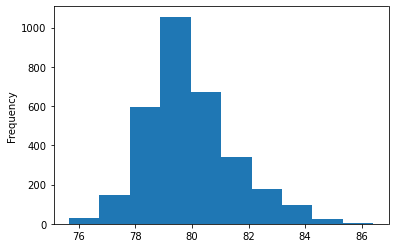

In [56]:
y.plot.hist()

[Text(0.5, 1.0, 'Average Temperature by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Temp (F)')]

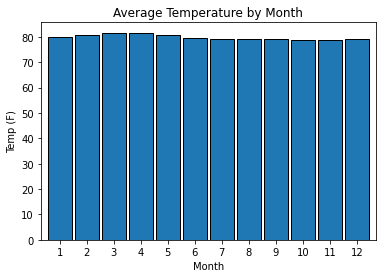

In [57]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Temperature by Month', xlabel='Month', ylabel='Temp (F)')

<AxesSubplot:xlabel='dt'>

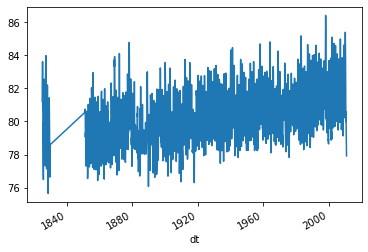

In [58]:
# visualize the target over time yearly
y.plot()

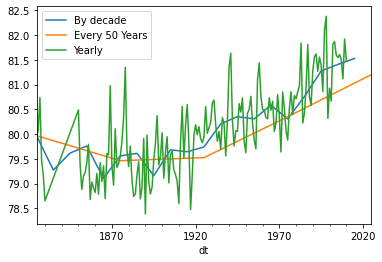

In [62]:
# now we can see the trend of temps by year, decade and every 50 years
y.resample('10Y').mean().plot(label ='By decade')
y.resample('50Y').mean().plot(label= 'Every 50 Years')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

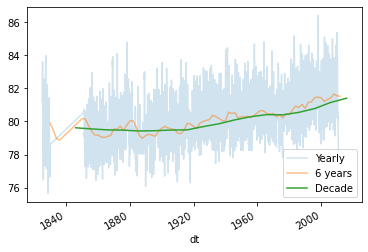

In [66]:
# let's look at the rolling trend
y.plot(alpha=.2, label='Yearly')
y.resample('2Y').mean().rolling(3).mean().plot(alpha=.5, label='6 years')
y.resample('10Y').mean().rolling(3).mean().plot(alpha=8, label='Decade')
plt.legend()

<AxesSubplot:title={'center':'Average decade change in temperature'}, xlabel='dt'>

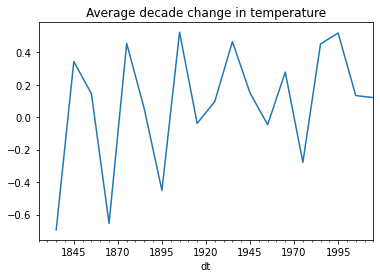

In [67]:
# visualize change over time
y.resample('10Y').mean().diff().plot(title='Average decade change in temperature')

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='dt'>

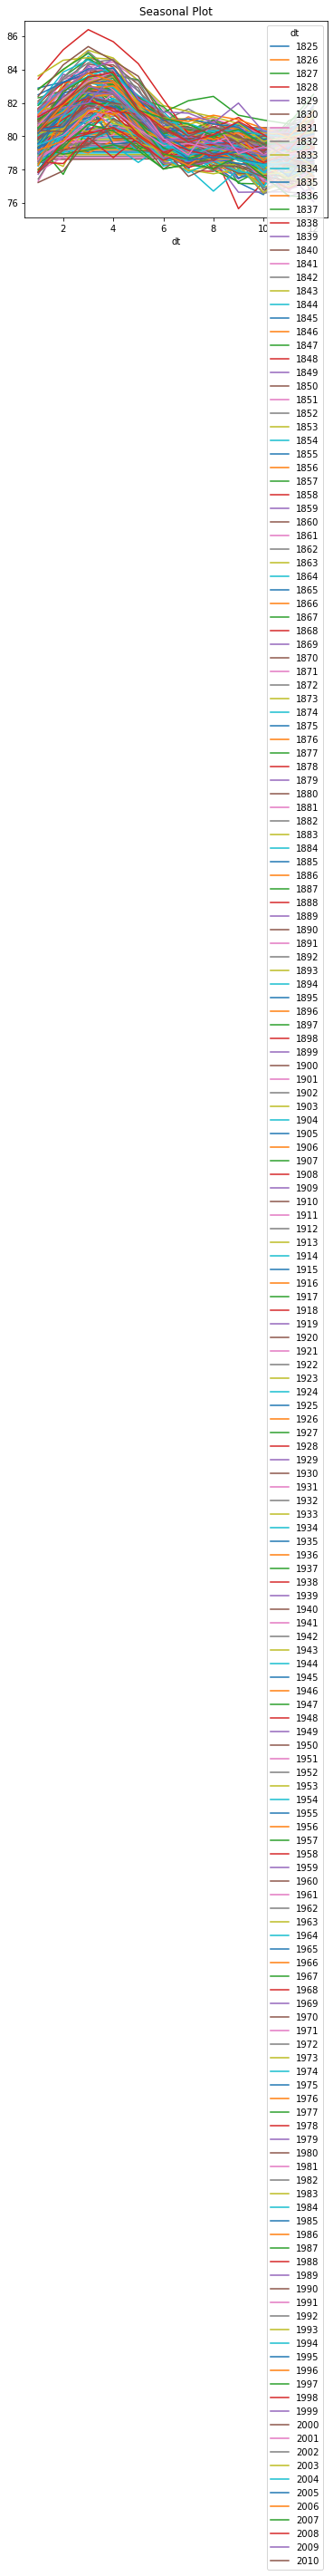

In [68]:
# create a seasonal plot
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

Text(0.5, 1.0, 'Lag plot with lag=1')

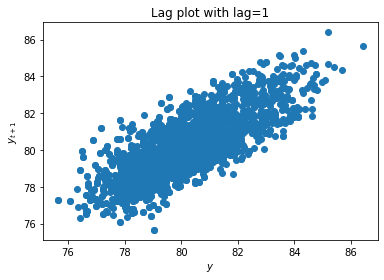

In [69]:
# lag plot
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

In [71]:
# use seasonal_decompose function from the statsmodels library to perform decomposition
y = train.Average_Temp_F.resample('10Y').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
dt,,,,
1825-12-31,79.968650,79.968650,0.0,0.0
1835-12-31,79.273933,79.273933,0.0,0.0
1845-12-31,79.616417,79.616417,0.0,0.0
1855-12-31,79.760324,79.760324,0.0,0.0
1865-12-31,79.105580,79.105580,0.0,0.0


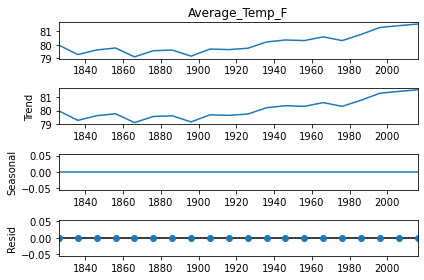

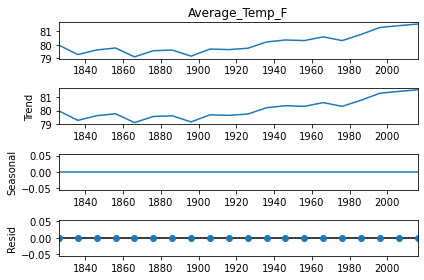

In [72]:
# the value returned from seasonal_decompose plotted
result.plot()

<AxesSubplot:xlabel='dt'>

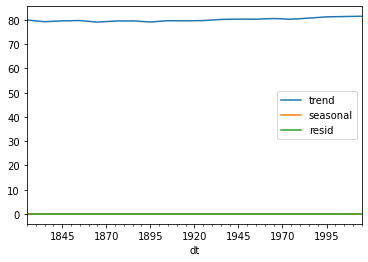

In [73]:
decomposition.iloc[:, 1:].plot()

In [76]:
train = train.resample('10Y').mean()
# create a categorical feature
train['temp_bin'] = pd.qcut(train.Average_Temp_F, 3, labels=['cool', 'warm', 'hot'])
train.groupby('temp_bin').mean()

,AverageTemperatureUncertainty,Average_Temp_F
temp_bin,,
cool,1.515296,79.424136
warm,0.964507,79.943952
hot,0.414407,80.889022


Text(0, 0.5, '% of days in the month')

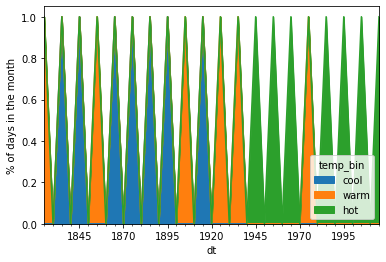

In [79]:
(train.groupby('temp_bin')
 .resample('5Y')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')

Takeaways
-the target variable temperature is normally distributed
-there is no much change in temperature by month at all
-average temperature yearly is slowly increasing
-when you look at temperature by decade its slope is less
-when you look at temperture by every 50 years the slope is less than by decade or by year
-from March to Dec the average temp is slowly dropping
-the lag plot shows a pretty strong linear correlation in temp from one year to the next

# Modeling